In [5]:
import pandas as pd


In [6]:
dataset = pd.read_csv('breast_cancer.csv')
dataset.head()

,Sample_Code,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
dataset['Bare_Nuclei'] = pd.to_numeric(dataset['Bare_Nuclei'], errors='coerce')

In [12]:
# df.dropna(inplace=True) # Original line causing the error
dataset.dropna(inplace=True) # Corrected line to use the 'dataset' DataFrame

In [14]:
# X = df.drop(columns=['Sample_Code', 'Class']) # Original line
# y = df['Class']  # 2 = benign, 4 = malignant # Original line

X = dataset.drop(columns=['Sample_Code', 'Class']) # Corrected line to use the 'dataset' DataFrame
y = dataset['Class']  # 2 = benign, 4 = malignant # Corrected line to use the 'dataset' DataFrame

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [18]:
y_pred = knn.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           2       0.94      0.99      0.96        79
           4       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



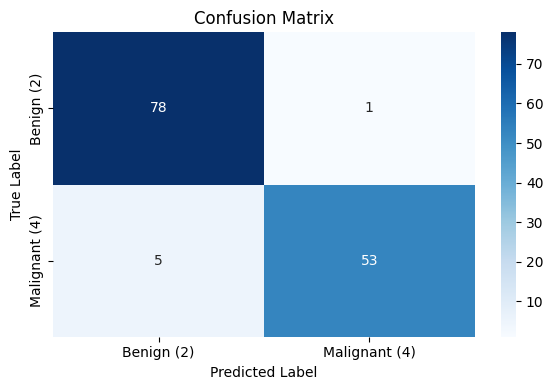

In [21]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign (2)', 'Malignant (4)'],
            yticklabels=['Benign (2)', 'Malignant (4)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


In [22]:
k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    y_k_pred = knn_k.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_k_pred))

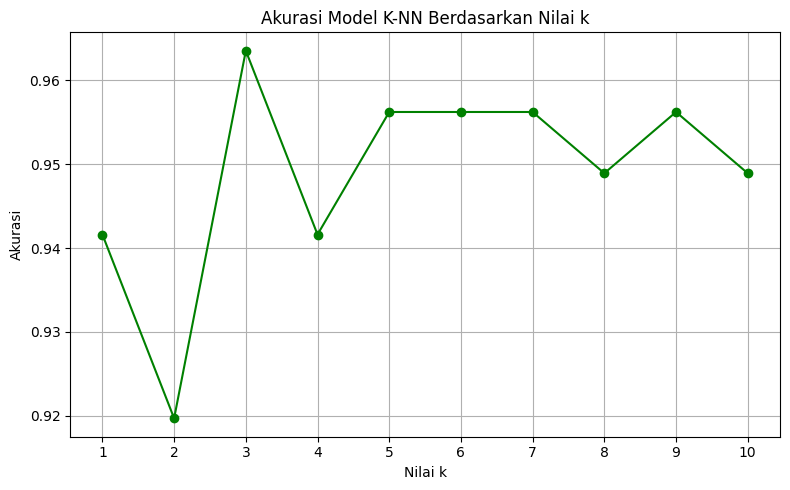

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='green')
plt.title('Akurasi Model K-NN Berdasarkan Nilai k')
plt.xlabel('Nilai k')
plt.ylabel('Akurasi')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()